# Blog Post: Logistic Regression

In [1]:
%load_ext autoreload
%autoreload 2
from LogisticRegression import LogisticRegression, GradientDescentOptimizer
import torch
from matplotlib import pyplot as plt 

In [2]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points, p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    return X, y

X, y = classification_data(noise = 0.5)

w = torch.linspace(-1, 1, X.shape[1])
w_prev = torch.linspace(-1, 1, X.shape[1])

In [3]:
def plot_data_and_boundary(X, y, w, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Plot the data
    targets = [0, 1]
    markers = ["o", ","]
    colors = ["red", "blue"]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = colors[i], cmap = "BrBG", marker = markers[i])

    # Draw the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_values = torch.linspace(x_min, x_max, 100)
    y_values = -(w[0]*x_values + w[2])/w[1]
    ax.plot(x_values, y_values, color='black')

    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    plt.show()

In [4]:
def accuracy(y_pred, y_true):
    correct = (y_pred == y_true).sum()
    total = y_true.shape[0]
    print(correct)
    return correct / total

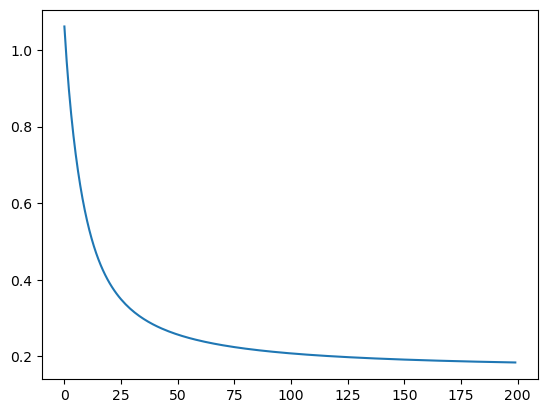

In [5]:
# vanilla gradient descent

LR = LogisticRegression(w)
opt = GradientDescentOptimizer(LR, w, w_prev)

losses = []

for _ in range(200):
    losses.append(LR.loss(X, y))
    opt.step(X, y, alpha = 0.5, beta = 0)

plt.plot(losses)

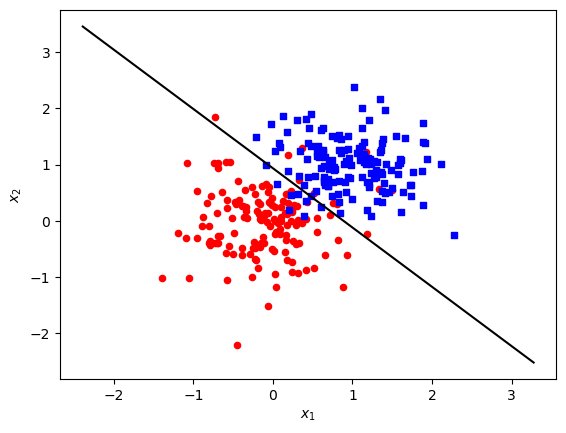

In [6]:
plot_data_and_boundary(X, y, LR.w)

In [7]:
# Predict the labels
y_pred = LR.predict(X)

# Calculate the accuracy
acc = accuracy(y_pred, y)
print(f'Accuracy: {acc}')

tensor(280)
Accuracy: 0.9333333373069763


(0.0, 100.0)

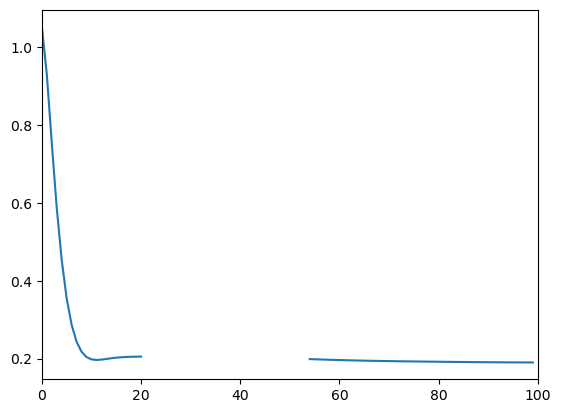

In [8]:
# momentum

X2, y2 = classification_data(noise = 0.5)
w2 = torch.linspace(-1, 1, X2.shape[1])
w_prev2 = torch.linspace(-1, 1, X2.shape[1])

LR2 = LogisticRegression(w)
opt2 = GradientDescentOptimizer(LR2, w2, w_prev2)

losses = []

for _ in range(100):
    losses.append(LR2.loss(X2, y2))
    opt2.step(X, y, alpha = 0.7, beta = 0.9)

plt.plot(losses)
plt.xlim(0, 100)

In [9]:
# Predict the labels
y_pred2 = LR2.predict(X2)

# Calculate the accuracy
acc = accuracy(y_pred2, y2)
print(f'Accuracy: {acc}')

tensor(273)
Accuracy: 0.9100000262260437


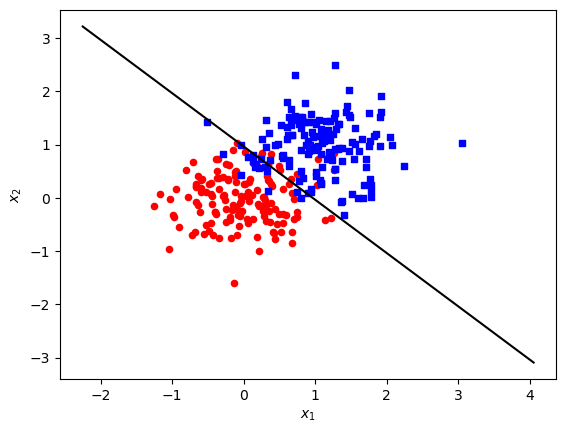

In [10]:
plot_data_and_boundary(X2, y2, LR2.w)

(0.0, 100.0)

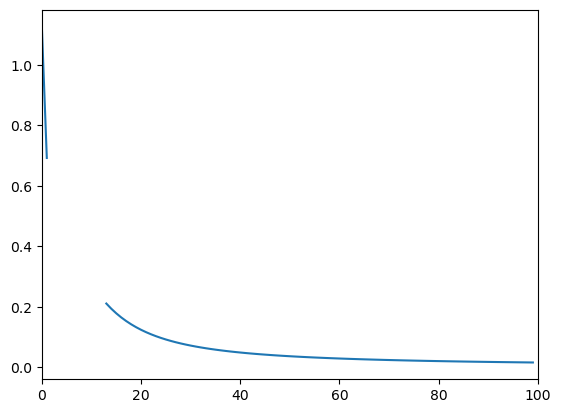

In [11]:
# overfitting

X_train, y_train = classification_data(n_points = 50, p_dims = 100)
X_test, y_test = classification_data(n_points = 50, p_dims = 100)

w3 = torch.linspace(-1, 1, X_train.shape[1])
w_prev3 = torch.linspace(-1, 1, X_train.shape[1])

LR3 = LogisticRegression(w3)
opt = GradientDescentOptimizer(LR3, w3, w_prev3)

losses = []

for _ in range(100):
    losses.append(LR3.loss(X_train, y_train))
    opt.step(X_train, y_train, alpha = 0.5, beta = 0.2)

plt.plot(losses)
plt.xlim(0, 100)

In [12]:
# Predict the labels
y_pred_train = LR3.predict(X_train)

# Calculate the accuracy
acc = accuracy(y_pred_train, y_train)
print(f'Accuracy: {acc}')

tensor(50)
Accuracy: 1.0


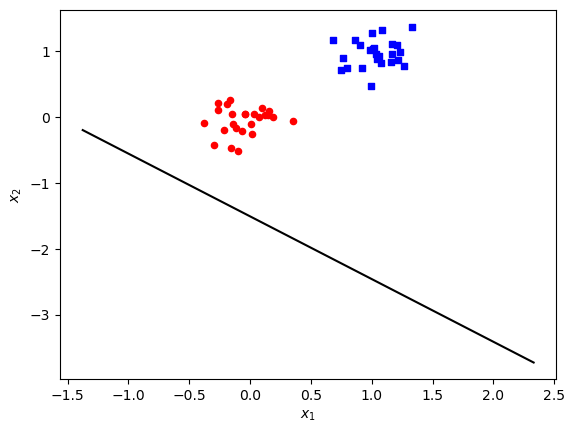

In [13]:
plot_data_and_boundary(X_train, y_train, LR3.w)

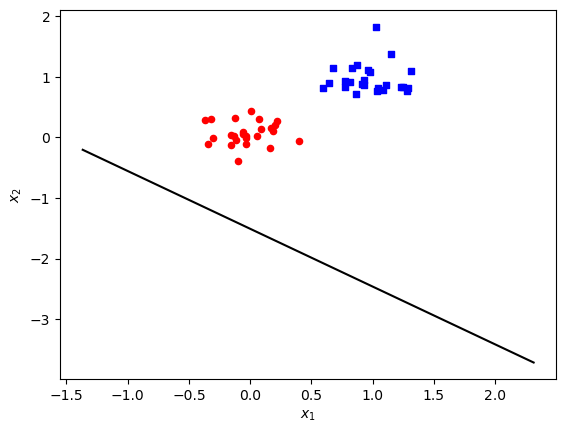

In [14]:
plot_data_and_boundary(X_test, y_test, LR3.w)

In [15]:
# Predict the labels
y_pred_test = LR3.predict(X_test)

# Calculate the accuracy
acc = accuracy(y_pred_test, y_test)
print(f'Accuracy: {acc}')

tensor(50)
Accuracy: 1.0
